# Images

## Matplotlib

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Created_with_Matplotlib-logo.svg/2048px-Created_with_Matplotlib-logo.svg.png" width="100px">

```python
import matplotlib.pyplot as plt
```

In [11]:
%pip install --quiet matplotlib
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'  # useful for retina screens

Note: you may need to restart the kernel to use updated packages.


[[ 86  23 142]
 [ 38  36  79]
 [ 28 154 242]]


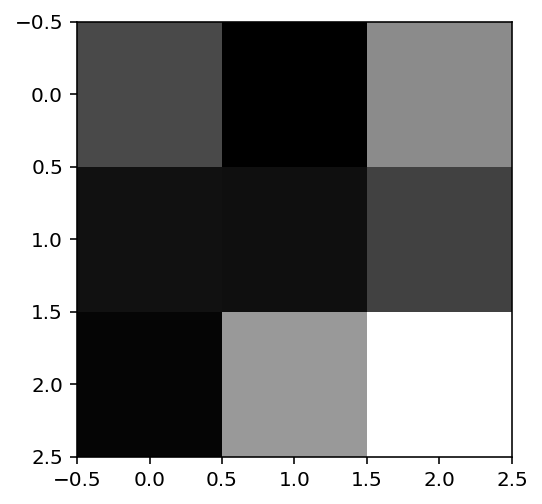

In [12]:
random = (np.random.rand(3, 3) * 255).astype(np.uint8)
print(random)
plt.imshow(random, cmap='gray');

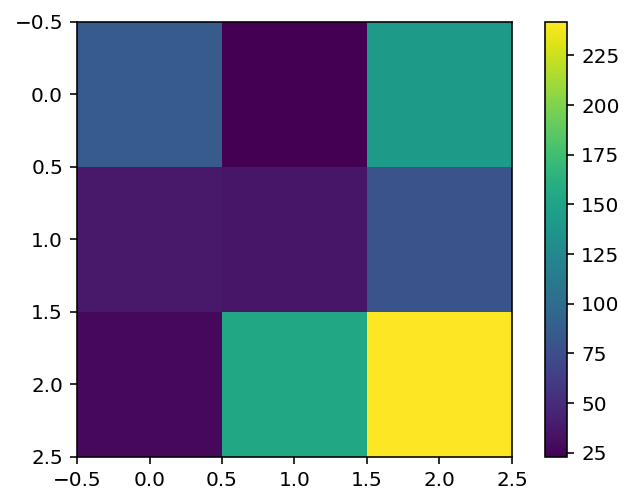

In [13]:
plt.imshow(random)
plt.colorbar();

Text(0.5, 1.0, 'Vertical stacking')

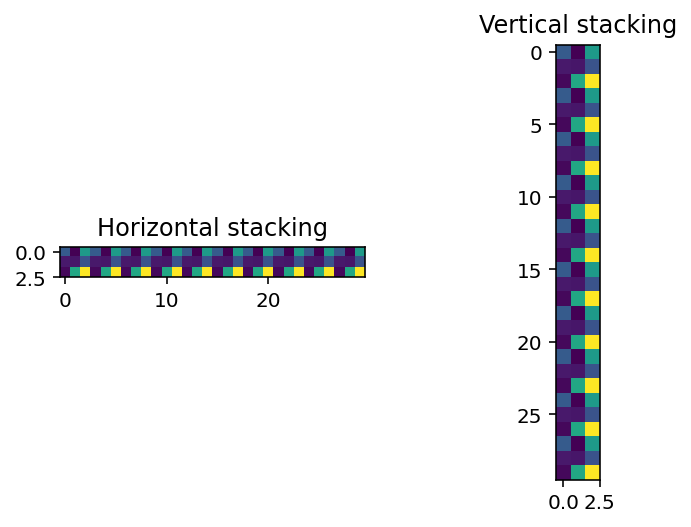

In [14]:
ten_randoms = 10 * [random]
random_ten_times_horizontal = np.hstack(ten_randoms)
random_ten_times_vertical = np.vstack(ten_randoms)
_, axes = plt.subplots(1, 2)
axes[0].imshow(random_ten_times_horizontal)
axes[0].set_title('Horizontal stacking')
axes[1].imshow(random_ten_times_vertical)
axes[1].set_title('Vertical stacking')

### Additive color mixing

<img src="https://cdn.pixabay.com/photo/2017/01/31/00/35/additive-2022630_1280.png" width="400px">

In [5]:
# Exercise for home: understand this cell
from itertools import product
pixels = list(product((0, 1), repeat=3))
print(pixels)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


[[[0 0 0]
  [0 0 1]
  [0 1 0]
  [0 1 1]
  [1 0 0]
  [1 0 1]
  [1 1 0]
  [1 1 1]]]
(1, 8, 3)


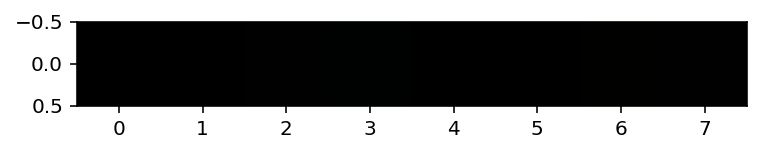

In [15]:
pixels_image = np.array(pixels)[np.newaxis]
print(pixels_image)
print(pixels_image.shape)
plt.imshow(pixels_image);

(1, 8, 3)
[[[  0   0   0]
  [  0   0 255]
  [  0 255   0]
  [  0 255 255]
  [255   0   0]
  [255   0 255]
  [255 255   0]
  [255 255 255]]]


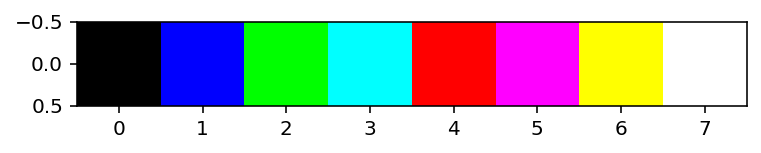

In [16]:
pixels_255 = (pixels_image * 255).astype(np.uint8)
print(pixels_255.shape)
print(pixels_255)
plt.imshow(pixels_255);

In [8]:
%pip install --quiet requests
import requests
face_path = 'face.jpg'
url = 'https://thispersondoesnotexist.com/image'
request = requests.get(url)
with open(face_path, 'wb') as f:
    f.write(request.content)

Note: you may need to restart the kernel to use updated packages.


In [9]:
array = plt.imread(face_path)
print('Data type:    ', array.dtype)
print('Shape:        ', array.shape)
print('Element size: ', array.itemsize)
print('Num. elements:', array.size)
print('Num. bytes:   ', array.nbytes)

Data type:     uint8
Shape:         (1024, 1024, 3)
Element size:  1
Num. elements: 3145728
Num. bytes:    3145728


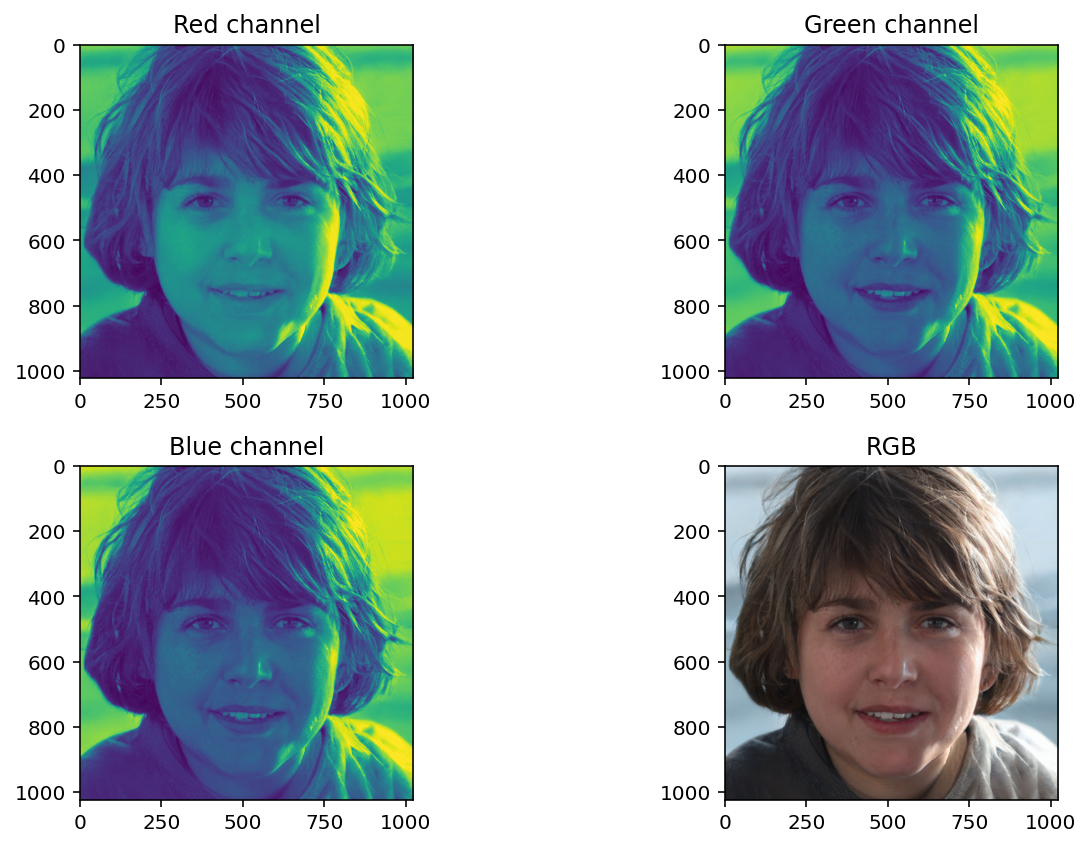

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
red, green, blue = [array[..., channel] for channel in range(3)]
axes[0, 0].imshow(red)
axes[0, 0].set_title('Red channel')
axes[0, 1].imshow(green)
axes[0, 1].set_title('Green channel')
axes[1, 0].imshow(blue)
axes[1, 0].set_title('Blue channel')
axes[1, 1].imshow(array)
axes[1, 1].set_title('RGB')
plt.tight_layout()

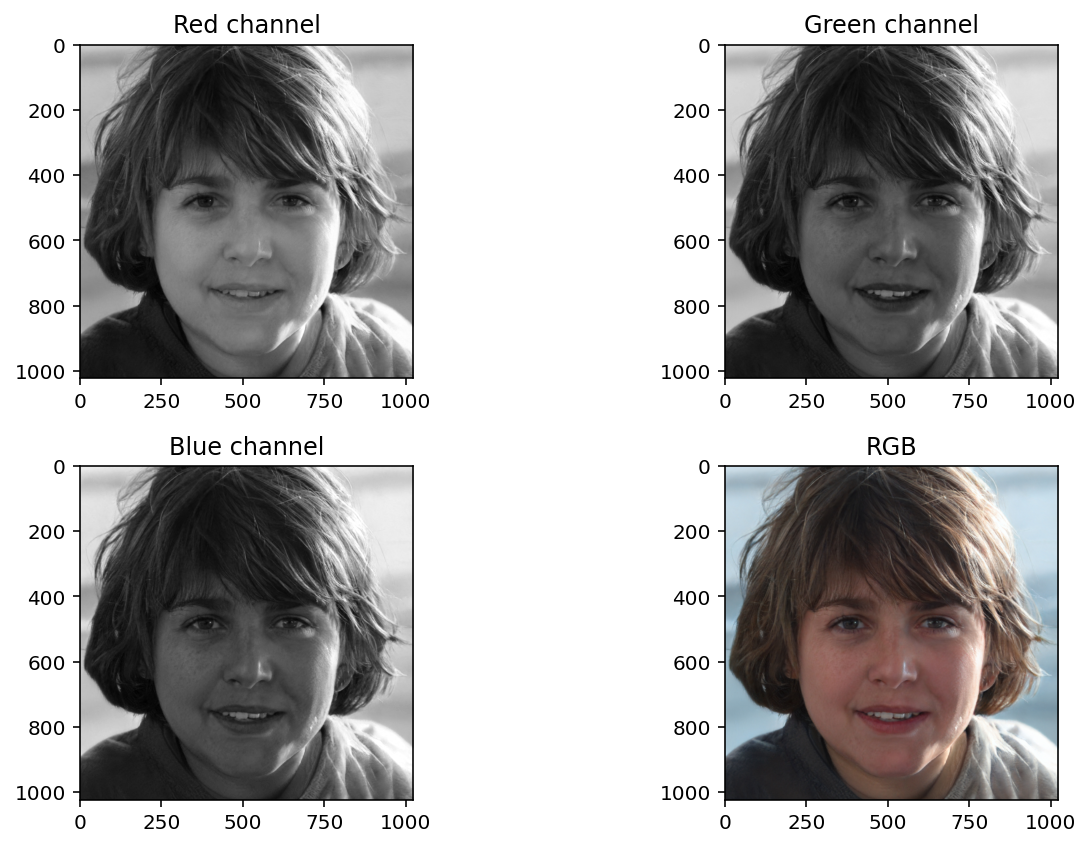

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
red, green, blue = [array[..., channel] for channel in range(3)]
axes[0, 0].imshow(red, cmap='gray')
axes[0, 0].set_title('Red channel')
axes[0, 1].imshow(green, cmap='gray')
axes[0, 1].set_title('Green channel')
axes[1, 0].imshow(blue, cmap='gray')
axes[1, 0].set_title('Blue channel')
axes[1, 1].imshow(array)
axes[1, 1].set_title('RGB')
plt.tight_layout()

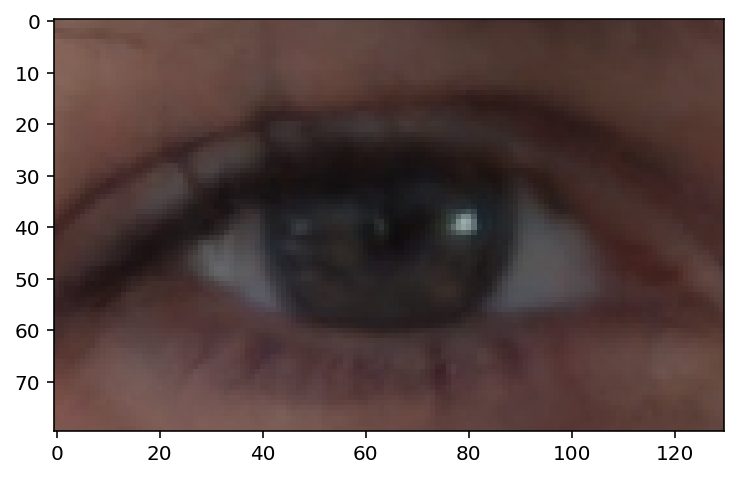

In [19]:
eye = array[440:520, 320:450]
plt.imshow(eye)

## Colormaps

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41467-020-19160-7/MediaObjects/41467_2020_19160_Fig1_HTML.png)

- [How Bad Is Your Colormap? (Or, Why People Hate Jet – and You Should Too)](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- [The misuse of colour in science communication](https://www.nature.com/articles/s41467-020-19160-7)
- [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map)
- [A dangerous rainbow: Why colormaps matter](https://blogs.mathworks.com/headlines/2018/10/10/a-dangerous-rainbow-why-colormaps-matter/)
- [No more rainbows!](https://agilescientific.com/blog/2017/12/14/no-more-rainbows)
- [Rainbow Colormaps – What are they good for? Absolutely nothing!](https://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/)
- [Using better colours in science](https://www.mn.uio.no/ceed/english/about/blog/2020/using-better-colours-in-science.html)
- [The unscientific colour map](https://www.fabiocrameri.ch/endrainbow/)

### Sequential colormaps

#### Yes:

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png)
![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png)

From [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

#### No:

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_007.png)

From [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

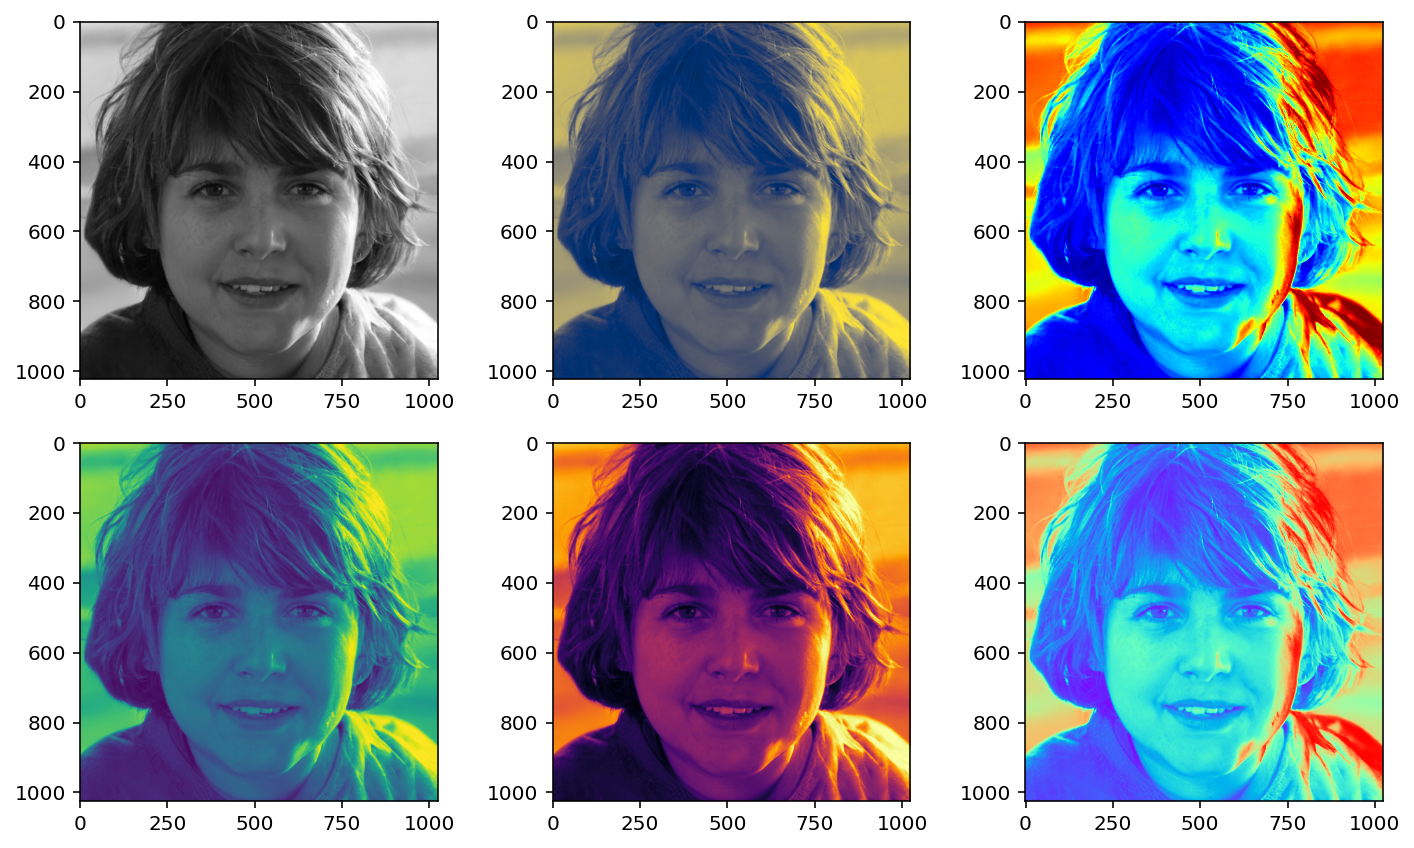

In [39]:
_, axes = plt.subplots(2, 3, figsize=(10, 6))
brightness = 0.2989 * red + 0.5870 * green + 0.1140 * blue
axes[0, 0].imshow(brightness, cmap='gray')
axes[1, 0].imshow(brightness, cmap='viridis')
axes[0, 1].imshow(brightness, cmap='cividis')
axes[1, 1].imshow(brightness, cmap='inferno')
axes[0, 2].imshow(brightness, cmap='jet')
axes[1, 2].imshow(brightness, cmap='rainbow')
plt.tight_layout()

### Diverging colormaps

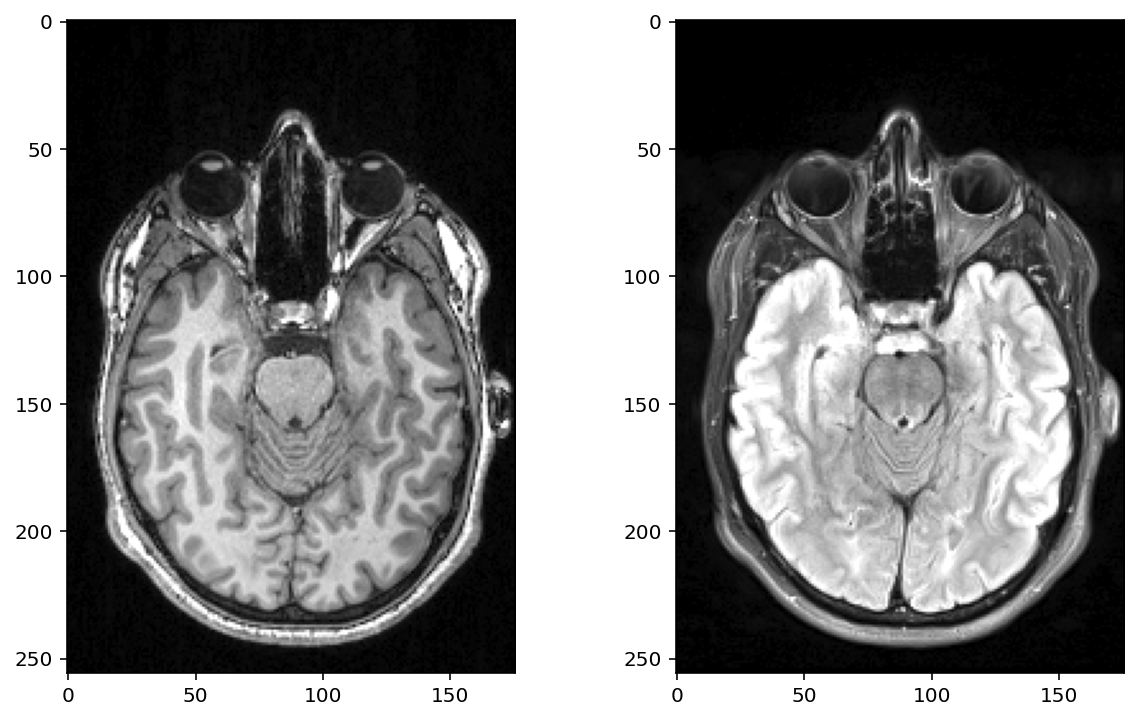

In [21]:
t1 = plt.imread('t1.png')[..., 0].astype(float)
t2 = plt.imread('t2.png')[..., 0].astype(float)
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].imshow(t1, cmap='gray')
axes[1].imshow(t2, cmap='gray');

Let's compute and plot the difference.

In [22]:
diff = t1 - t2

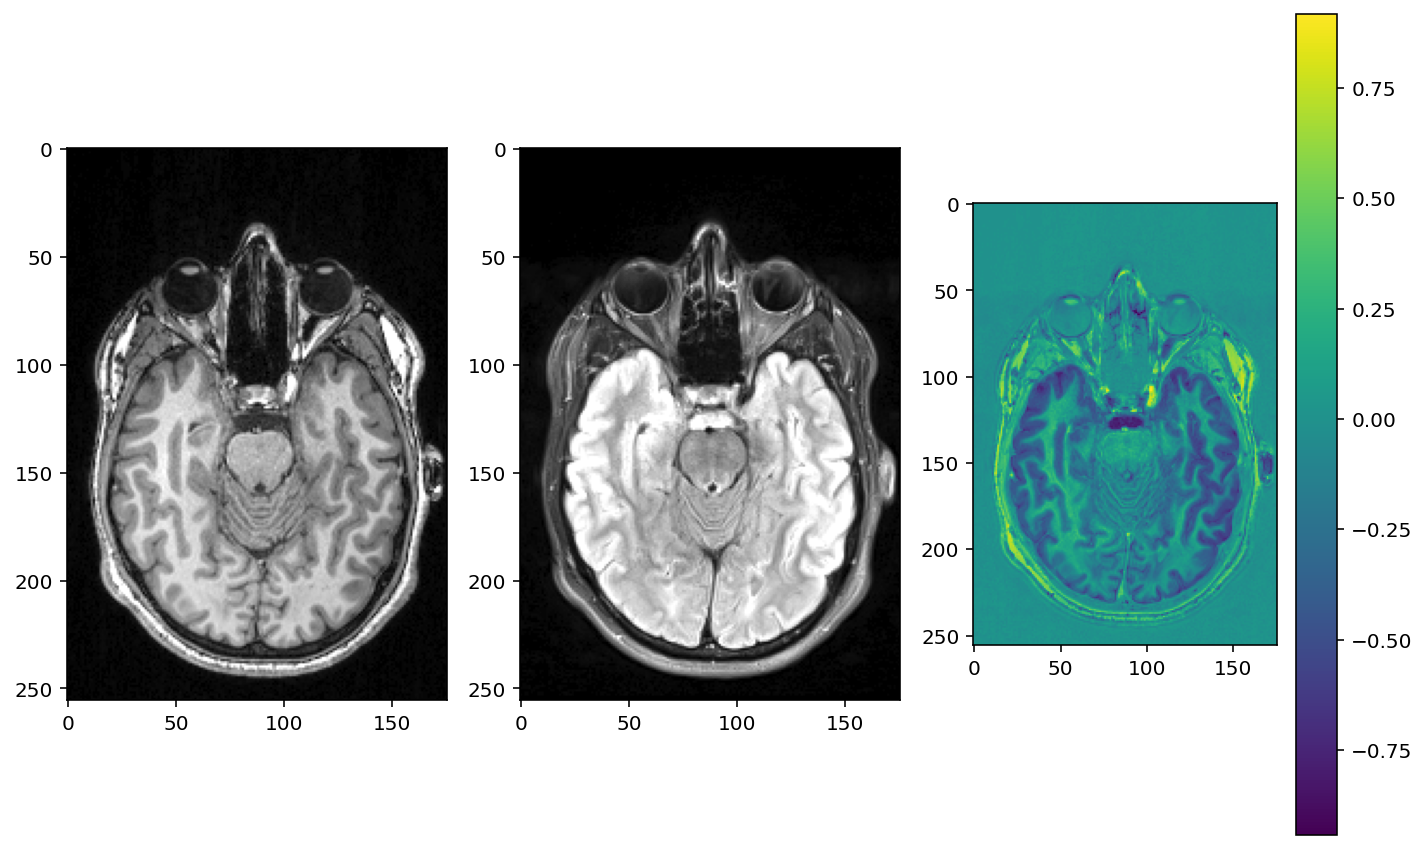

In [23]:
_, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(t1, cmap='gray')
axes[1].imshow(t2, cmap='gray')
im = axes[2].imshow(diff)
plt.colorbar(im, ax=axes[2])
plt.tight_layout()

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png)

![](https://www.e-education.psu.edu/geog486/sites/www.e-education.psu.edu.geog486/files/Lesson_04/Images/4.3.9.png)

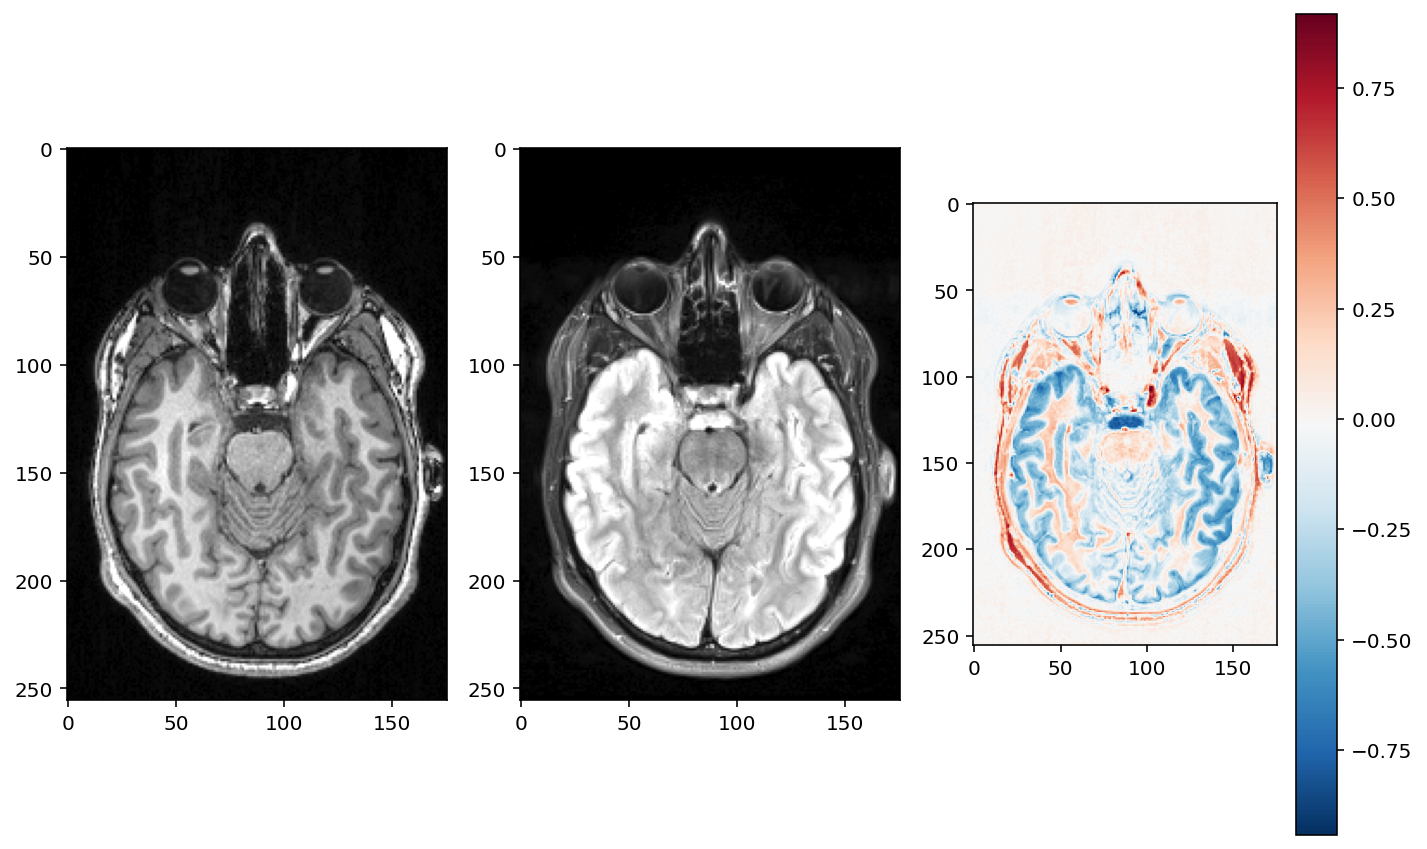

In [25]:
_, axes = plt.subplots(1, 3, figsize=(10, 6))
axes[0].imshow(t1, cmap='gray')
axes[1].imshow(t2, cmap='gray')
im = axes[2].imshow(diff, cmap='RdBu_r')
plt.colorbar(im, ax=axes[2])
plt.tight_layout()

## Pillow

<img src="https://python.land/wp-content/uploads/2020/12/pillow-logo.jpg" width="100px">

```python
from PIL import Image
```

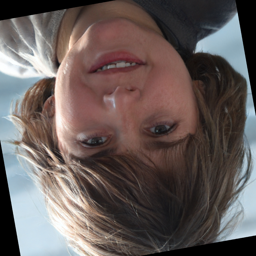

In [26]:
from PIL import Image
face = Image.open('face.jpg')
face.rotate(190).resize((256, 256))

In [27]:
pixels_255_image = Image.fromarray(pixels_255)
pixels_255_image

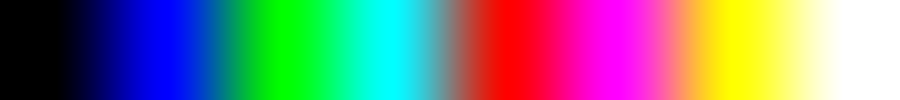

In [28]:
pixels_255_image.resize((900, 100))

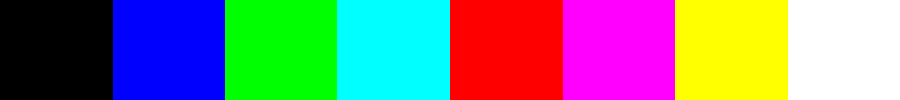

In [29]:
pixels_255_image.resize((900, 100), resample=Image.NEAREST)

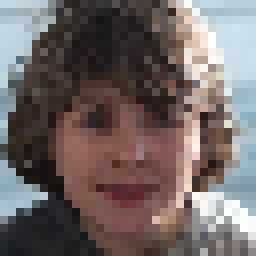

In [34]:
small_nearest = face.resize((32, 32), resample=Image.NEAREST)
large_nearest = small_nearest.resize((256, 256), resample=Image.NEAREST)
large_nearest

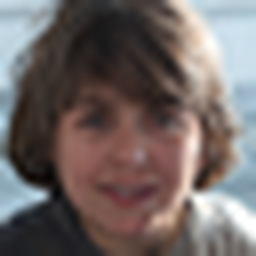

In [38]:
small_fancy = face.resize((32, 32), resample=Image.LANCZOS)
large_fancy = small_fancy.resize((256, 256), resample=Image.LANCZOS)
large_fancy

More information on image interpolation:

- [Cambridge in Colour - Digital Image Interpolation](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm)
- [Wikipedia - Image scaling](https://en.wikipedia.org/wiki/Image_scaling)